<a href="https://colab.research.google.com/github/gobi2001-2006/computer-vision/blob/main/FAST_FOURIER_TRANSFORM_AND_HISTOGRAM_OPERATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Discrete Fourier Transform (DFT) converts an image from the spatial domain (pixel representation) to the frequency domain, where the image is represented as a sum of sinusoidal waves of different frequencies.

Magnitude Spectrum
∣
𝐹
(
𝑢
,
𝑣
)
∣
=
Re
(
𝐹
)
2
+
Im
(
𝐹
)
2
∣F(u,v)∣=
Re(F)
2
 +Im(F)
2

​

Represents the strength of different frequency components.
Large values indicate low frequencies (smooth regions), and small values indicate high frequencies (edges, fine details).

Phase Spectrum
𝜃
(
𝑢
,
𝑣
)
=
tan
⁡
−
1
(
Im
(
𝐹
)
Re
(
𝐹
)
)
θ(u,v)=tan
−1
 (
Re(F)
Im(F)
​
 )
Represents the position information of different frequency components.
Essential for reconstructing the image.


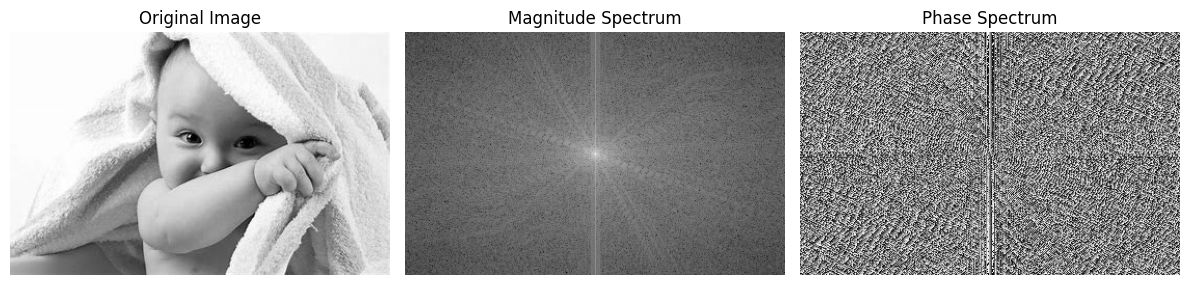

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('baby.jpeg', cv2.IMREAD_GRAYSCALE)


dft = np.fft.fft2(image)
dft_shifted = np.fft.fftshift(dft)


magnitude_spectrum = np.abs(dft_shifted)
phase_spectrum = np.angle(dft_shifted)

magnitude_spectrum = 20 * np.log(1 + magnitude_spectrum)

# Display results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(phase_spectrum, cmap='gray')
plt.title("Phase Spectrum")
plt.axis('off')

plt.tight_layout()
plt.show()


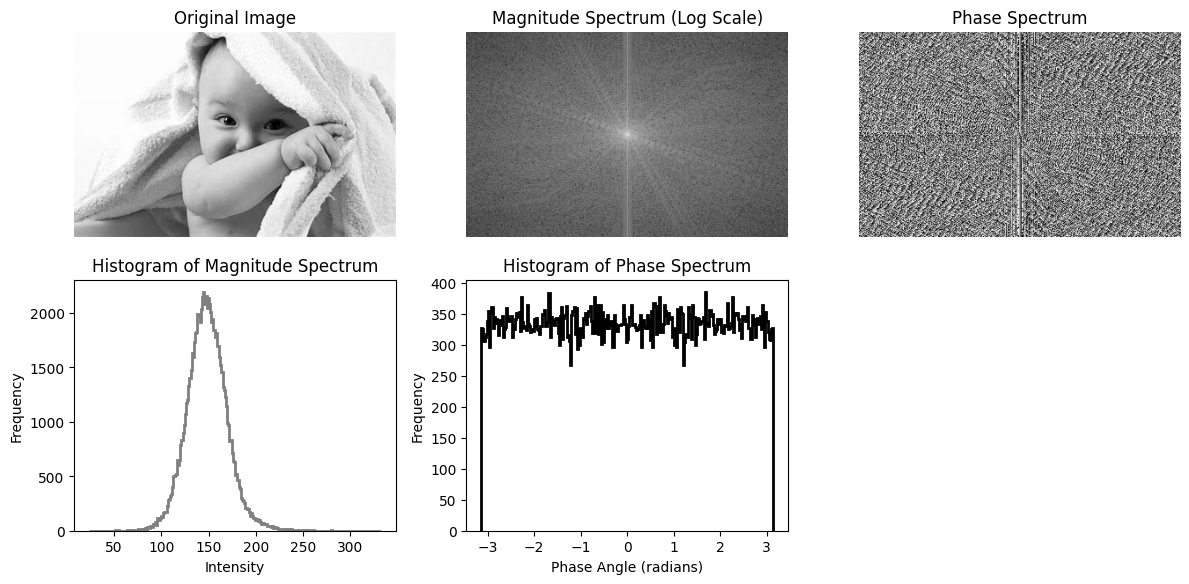

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('baby.jpeg', cv2.IMREAD_GRAYSCALE)

if image is None:
    raise FileNotFoundError("Image not found. Check the file path.")

# Compute the 2D DFT
dft = np.fft.fft2(image)
dft_shifted = np.fft.fftshift(dft)  # Shift the DC component to the center

# Compute Magnitude and Phase Spectrum
magnitude_spectrum = np.abs(dft_shifted)
phase_spectrum = np.angle(dft_shifted)

# Log scale for better visualization
magnitude_spectrum_log = 20 * np.log(1 + magnitude_spectrum)

# Plotting the results
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Magnitude Spectrum
plt.subplot(2, 3, 2)
plt.imshow(magnitude_spectrum_log, cmap='gray')
plt.title("Magnitude Spectrum (Log Scale)")
plt.axis('off')


plt.subplot(2, 3, 3)
plt.imshow(phase_spectrum, cmap='gray')
plt.title("Phase Spectrum")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.hist(magnitude_spectrum_log.ravel(), bins=256, color='gray', histtype='step', linewidth=2)
plt.title("Histogram of Magnitude Spectrum")
plt.xlabel("Intensity")
plt.ylabel("Frequency")

plt.subplot(2, 3, 5)
plt.hist(phase_spectrum.ravel(), bins=256, color='black', histtype='step', linewidth=2)
plt.title("Histogram of Phase Spectrum")
plt.xlabel("Phase Angle (radians)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


Contrast stretching (or normalization) enhances the contrast of an image by spreading out the intensity values across a wider range.

Original Min: 0, Max: 255
Original Image Matrix:
[[253 253 253 ... 246 249 251]
 [253 253 253 ... 245 248 250]
 [253 253 253 ... 244 246 249]
 ...
 [170 169 168 ... 228 231 228]
 [174 173 172 ... 225 227 229]
 [174 173 172 ... 226 228 230]]
Stretched Image Matrix:
[[253 253 253 ... 246 249 251]
 [253 253 253 ... 245 248 250]
 [253 253 253 ... 244 246 249]
 ...
 [170 169 168 ... 228 231 228]
 [174 173 172 ... 225 227 229]
 [174 173 172 ... 226 228 230]]


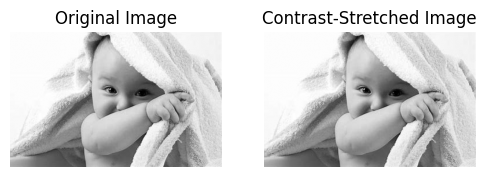

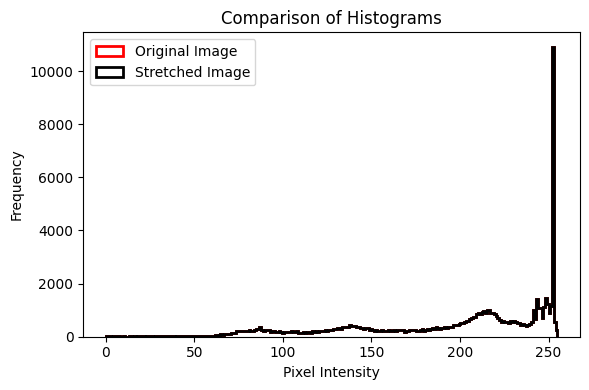

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('baby.jpeg', cv2.IMREAD_GRAYSCALE)  # Load the image in grayscale

if image is None:
    raise FileNotFoundError("Image not found. Check the file path.")

# Get min and max pixel values of the original image
f_min, f_max = np.min(image), np.max(image)

# Check the min and max values to see the dynamic range
print(f"Original Min: {f_min}, Max: {f_max}")

# Apply contrast stretching
stretched_image = (image - f_min) * (255.0 / (f_max - f_min))
stretched_image = np.clip(stretched_image, 0, 255).astype(np.uint8)  # Ensure values are valid

# Printing matrices for both images
print("Original Image Matrix:")
print(image)
print("Stretched Image Matrix:")
print(stretched_image)

# Plot the images and histograms for comparison
plt.figure(figsize=(6, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Contrast-Stretched Image
plt.subplot(1, 2, 2)
plt.imshow(stretched_image, cmap='gray')
plt.title("Contrast-Stretched Image")
plt.axis('off')

# Plotting a single combined histogram for comparison
plt.figure(figsize=(6, 4))
plt.hist(image.ravel(), bins=256, color='red', histtype='step', linewidth=2, label="Original Image")
plt.hist(stretched_image.ravel(), bins=256, color='black', histtype='step', linewidth=2, label="Stretched Image")
plt.title("Comparison of Histograms")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()


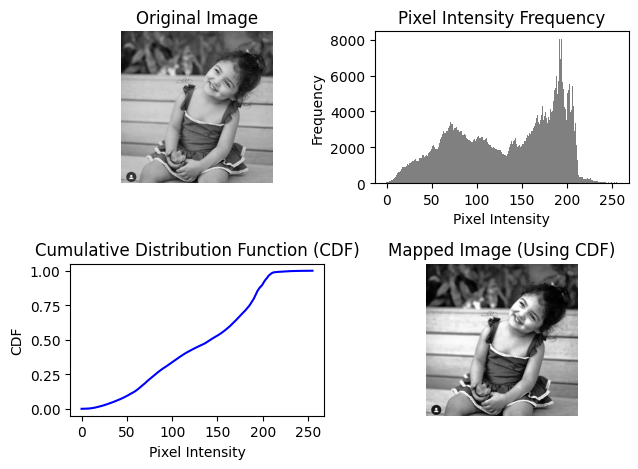

Frequency Table:
Intensity 0: Frequency 88
Intensity 1: Frequency 58
Intensity 2: Frequency 87
Intensity 3: Frequency 98
Intensity 4: Frequency 138
Intensity 5: Frequency 172
Intensity 6: Frequency 204
Intensity 7: Frequency 222
Intensity 8: Frequency 247
Intensity 9: Frequency 282
Intensity 10: Frequency 370
Intensity 11: Frequency 479
Intensity 12: Frequency 542
Intensity 13: Frequency 635
Intensity 14: Frequency 647
Intensity 15: Frequency 706
Intensity 16: Frequency 777
Intensity 17: Frequency 893
Intensity 18: Frequency 889
Intensity 19: Frequency 904
Intensity 20: Frequency 889
Intensity 21: Frequency 917
Intensity 22: Frequency 976
Intensity 23: Frequency 1054
Intensity 24: Frequency 1020
Intensity 25: Frequency 1112
Intensity 26: Frequency 1154
Intensity 27: Frequency 1156
Intensity 28: Frequency 1271
Intensity 29: Frequency 1219
Intensity 30: Frequency 1218
Intensity 31: Frequency 1297
Intensity 32: Frequency 1351
Intensity 33: Frequency 1257
Intensity 34: Frequency 1215
Inten

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = cv2.imread('baby.jpg', cv2.IMREAD_GRAYSCALE)

if image is None:
    raise FileNotFoundError("Image not found. Check the file path.")

# Step 1: Compute the frequency of each pixel intensity
frequency = np.zeros(256, dtype=int)

# Count the frequency of each pixel intensity (0-255)
for i in range(256):
    frequency[i] = np.sum(image == i)

# Step 2: Compute the cumulative distribution function (CDF)
cdf = np.cumsum(frequency)  # Cumulative sum of the frequencies
cdf_normalized = cdf / cdf[-1]  # Normalize CDF to the range [0, 1]

# Step 3: Map the pixel intensities using the CDF
mapping = np.uint8(255 * cdf_normalized)  # Mapping based on the normalized CDF

# Step 4: Apply the mapping to the image
mapped_image = mapping[image]  # Map original pixel values to new values using the CDF

# Step 5: Plot the results

# Plot the original image
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Plot the frequency histogram
plt.subplot(2, 2, 2)
plt.bar(range(256), frequency, color='gray', width=1)
plt.title("Pixel Intensity Frequency")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# Plot the CDF
plt.subplot(2, 2, 3)
plt.plot(cdf_normalized, color='blue')
plt.title("Cumulative Distribution Function (CDF)")
plt.xlabel("Pixel Intensity")
plt.ylabel("CDF")

# Plot the mapped image
plt.subplot(2, 2, 4)
plt.imshow(mapped_image, cmap='gray')
plt.title("Mapped Image (Using CDF)")
plt.axis('off')

plt.tight_layout()
plt.show()

# Output frequency and CDF as a table
print("Frequency Table:")
for i in range(256):
    print(f"Intensity {i}: Frequency {frequency[i]}")

print("\nCDF Table:")
for i in range(256):
    print(f"Intensity {i}: CDF {cdf_normalized[i]:.4f}")



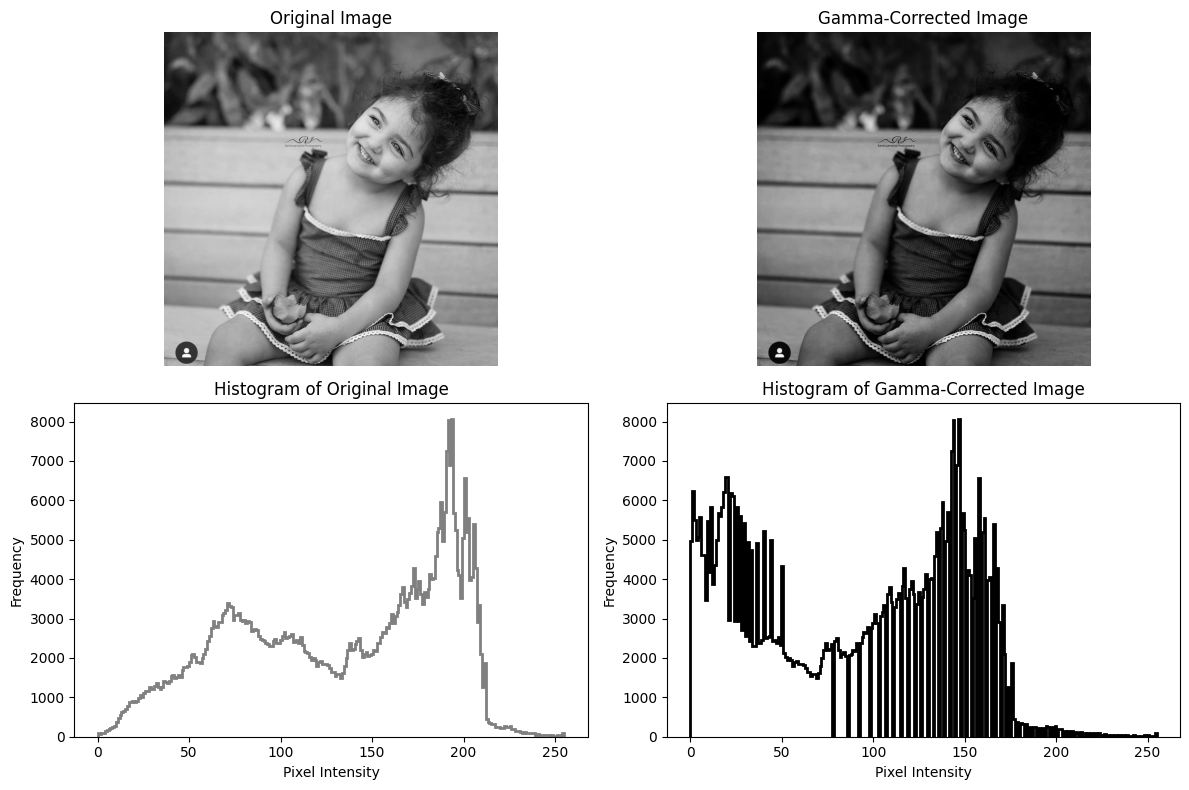

In [ ]:
# Gamma Correction: Apply gamma to the image pixel values
def gamma_correction(image, gamma=1.0):
    gamma_corrected_image = np.uint8(255 * (image / 255) ** gamma)
    return gamma_corrected_image

# Apply Gamma Correction with gamma=2.0
gamma_image = gamma_correction(image, gamma=2.0)

# Plot the original and gamma-corrected images with histograms
plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Gamma-Corrected Image
plt.subplot(2, 2, 2)
plt.imshow(gamma_image, cmap='gray')
plt.title("Gamma-Corrected Image")
plt.axis('off')

# Histogram of the Original Image
plt.subplot(2, 2, 3)
plt.hist(image.ravel(), bins=256, color='gray', histtype='step', linewidth=2)
plt.title("Histogram of Original Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# Histogram of the Gamma-Corrected Image
plt.subplot(2, 2, 4)
plt.hist(gamma_image.ravel(), bins=256, color='black', histtype='step', linewidth=2)
plt.title("Histogram of Gamma-Corrected Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


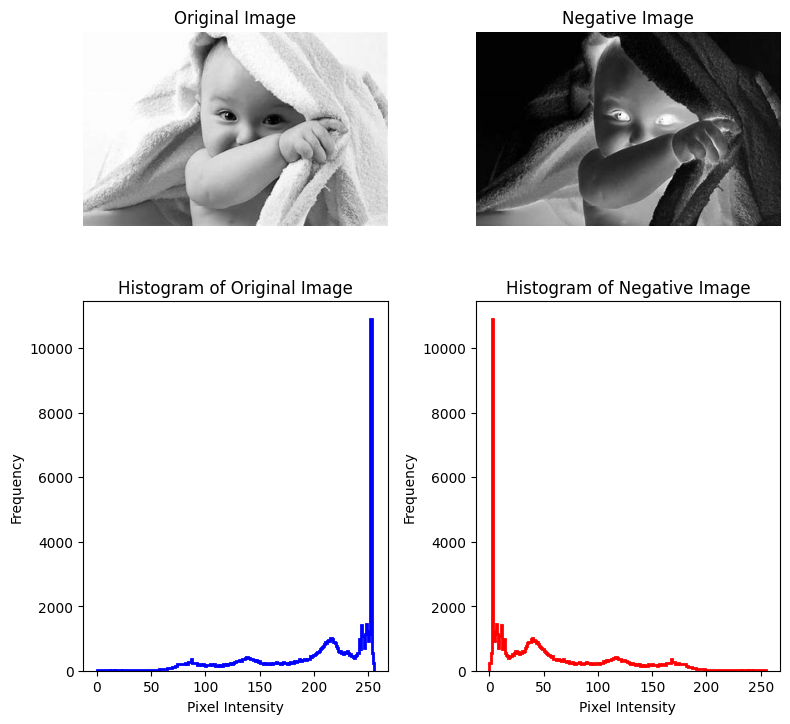

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('baby.jpeg', cv2.IMREAD_GRAYSCALE)  # Load image in grayscale

# Check if the image is loaded properly
if image is None:
    raise FileNotFoundError("Image not found. Check the file path.")

# Create the negative image
negative_image = 255 - image

# Plot the original and negative images along with their histograms
plt.figure(figsize=(8, 8))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Negative Image
plt.subplot(2, 2, 2)
plt.imshow(negative_image, cmap='gray')
plt.title("Negative Image")
plt.axis('off')

# Histogram of the Original Image
plt.subplot(2, 2, 3)
plt.hist(image.ravel(), bins=256, color='blue', histtype='step', linewidth=2)
plt.title("Histogram of Original Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# Histogram of the Negative Image
plt.subplot(2, 2, 4)
plt.hist(negative_image.ravel(), bins=256, color='red', histtype='step', linewidth=2)
plt.title("Histogram of Negative Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


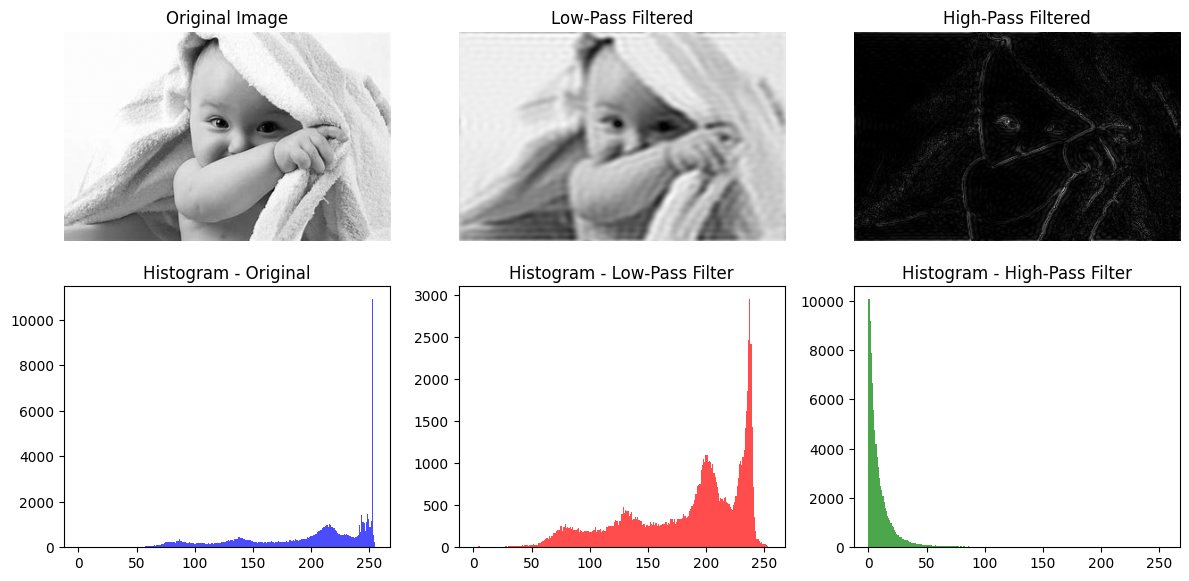

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread("baby.jpeg", cv2.IMREAD_GRAYSCALE)
if image is None:
    raise ValueError("Image not found. Make sure 'image.jpg' exists in the directory.")

dft = np.fft.fft2(image)
dft_shift = np.fft.fftshift(dft)

rows, cols = image.shape
crow, ccol = rows // 2, cols // 2


lpf_mask = np.zeros((rows, cols), np.uint8)
radius = 30
cv2.circle(lpf_mask, (ccol, crow), radius, 1, thickness=-1)  # Create a circular mask
lpf_dft = dft_shift * lpf_mask  # Apply mask
lpf_image = np.abs(np.fft.ifft2(np.fft.ifftshift(lpf_dft)))  # Inverse DFT

# High-Pass Filter (HPF)
hpf_mask = np.ones((rows, cols), np.uint8)
cv2.circle(hpf_mask, (ccol, crow), radius, 0, thickness=-1)  # Create a circular mask
hpf_dft = dft_shift * hpf_mask  # Apply mask
hpf_image = np.abs(np.fft.ifft2(np.fft.ifftshift(hpf_dft)))  # Inverse DFT

# Normalize images for better visualization
lpf_image = cv2.normalize(lpf_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
hpf_image = cv2.normalize(hpf_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Plot Original and Filtered Images
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(lpf_image, cmap="gray")
plt.title("Low-Pass Filtered")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(hpf_image, cmap="gray")
plt.title("High-Pass Filtered")
plt.axis("off")

# Plot Histograms
plt.subplot(2, 3, 4)
plt.hist(image.ravel(), bins=256, color="b", alpha=0.7)
plt.title("Histogram - Original")

plt.subplot(2, 3, 5)
plt.hist(lpf_image.ravel(), bins=256, color="r", alpha=0.7)
plt.title("Histogram - Low-Pass Filter")

plt.subplot(2, 3, 6)
plt.hist(hpf_image.ravel(), bins=256, color="g", alpha=0.7)
plt.title("Histogram - High-Pass Filter")

plt.tight_layout()
plt.show()


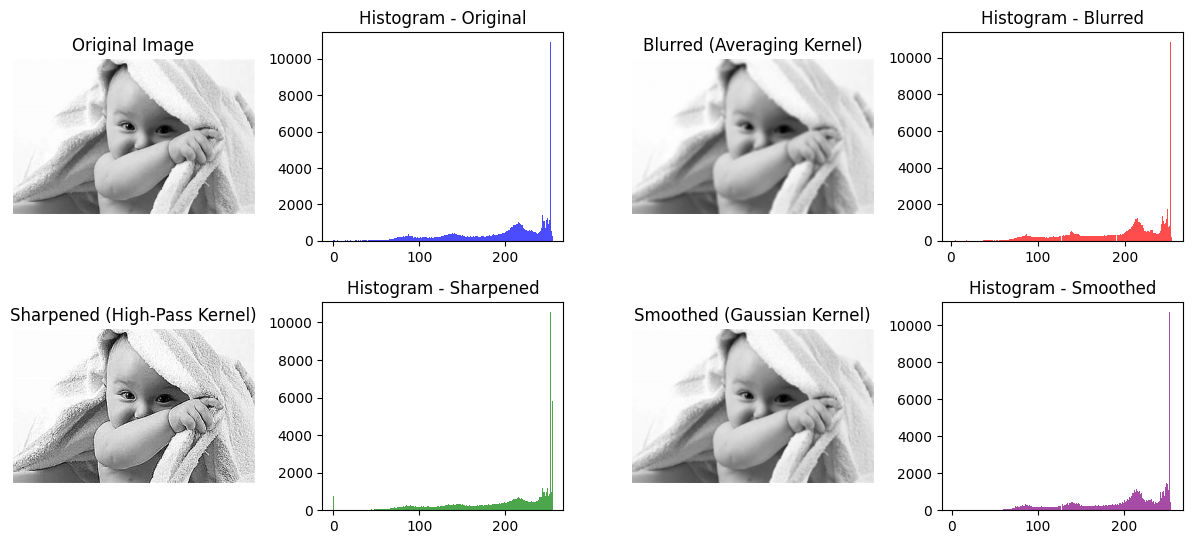

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread("baby.jpeg", cv2.IMREAD_GRAYSCALE)
if image is None:
    raise ValueError("Image not found. Ensure 'image.jpeg' is in the directory.")

# Define Kernels
blur_kernel = np.ones((5, 5), np.float32) / 25  # Averaging Kernel for Blurring
sharpen_kernel = np.array([[ 0, -1,  0],
                            [-1,  5, -1],
                            [ 0, -1,  0]])  # Sharpening Kernel
gaussian_kernel = (1/16) * np.array([[1, 2, 1],
                                     [2, 4, 2],
                                     [1, 2, 1]])  # Gaussian Smoothing Kernel

# Apply Filters
blurred = cv2.filter2D(image, -1, blur_kernel)  # Apply Blurring
sharpened = cv2.filter2D(image, -1, sharpen_kernel)  # Apply Sharpening
smoothed = cv2.filter2D(image, -1, gaussian_kernel)  # Apply Gaussian Smoothing

# Plot the Results
plt.figure(figsize=(12, 8))

# Original Image and Histogram
plt.subplot(3, 4, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(3, 4, 2)
plt.hist(image.ravel(), bins=256, color="b", alpha=0.7)
plt.title("Histogram - Original")

# Blurred Image and Histogram
plt.subplot(3, 4, 3)
plt.imshow(blurred, cmap="gray")
plt.title("Blurred (Averaging Kernel)")
plt.axis("off")

plt.subplot(3, 4, 4)
plt.hist(blurred.ravel(), bins=256, color="r", alpha=0.7)
plt.title("Histogram - Blurred")

# Sharpened Image and Histogram
plt.subplot(3, 4, 5)
plt.imshow(sharpened, cmap="gray")
plt.title("Sharpened (High-Pass Kernel)")
plt.axis("off")

plt.subplot(3, 4, 6)
plt.hist(sharpened.ravel(), bins=256, color="g", alpha=0.7)
plt.title("Histogram - Sharpened")

# Smoothed Image and Histogram
plt.subplot(3, 4, 7)
plt.imshow(smoothed, cmap="gray")
plt.title("Smoothed (Gaussian Kernel)")
plt.axis("off")

plt.subplot(3, 4, 8)
plt.hist(smoothed.ravel(), bins=256, color="purple", alpha=0.7)
plt.title("Histogram - Smoothed")

plt.tight_layout()
plt.show()


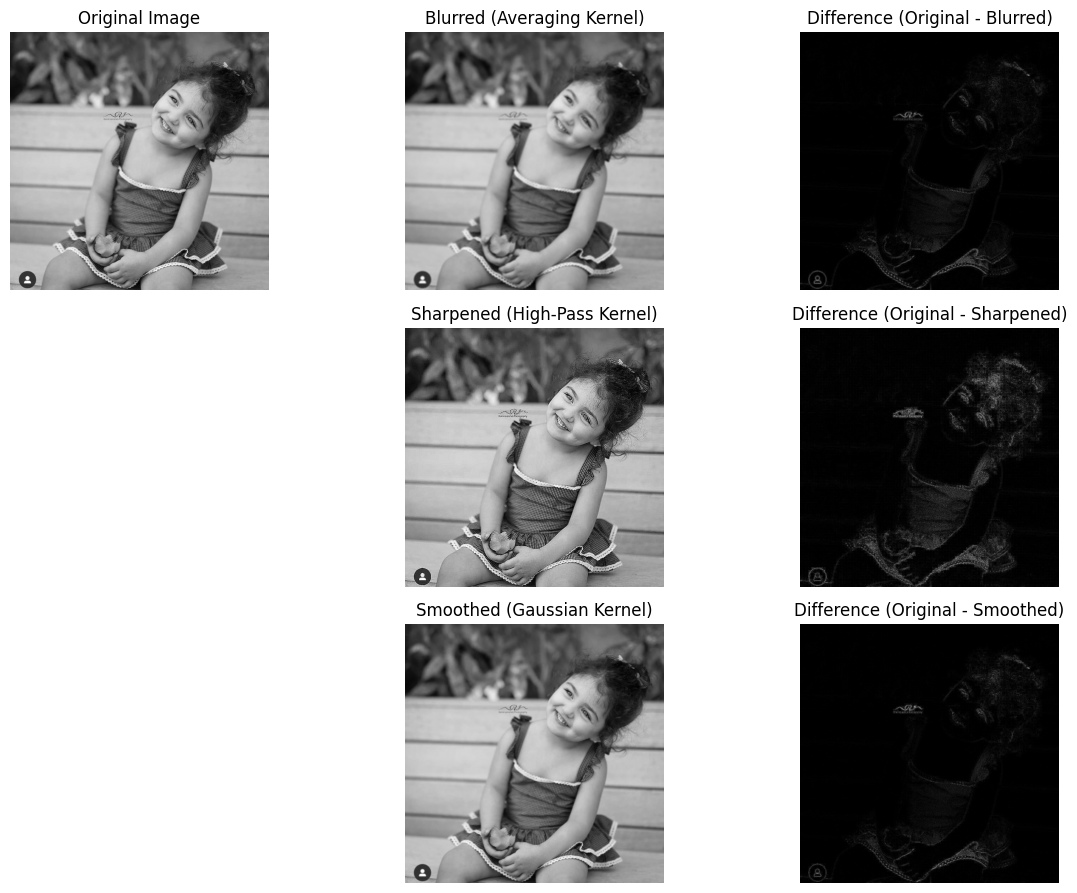

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread("baby.jpg", cv2.IMREAD_GRAYSCALE)
if image is None:
    raise ValueError("Image not found. Ensure 'image.jpg' is in the directory.")

# Define Kernels
blur_kernel = np.ones((5, 5), np.float32) / 25  # Averaging Kernel for Blurring
sharpen_kernel = np.array([[ 0, -1,  0],
                            [-1,  5, -1],
                            [ 0, -1,  0]])  # Sharpening Kernel
gaussian_kernel = (1/16) * np.array([[1, 2, 1],
                                     [2, 4, 2],
                                     [1, 2, 1]])  # Gaussian Smoothing Kernel

# Apply Filters
blurred = cv2.filter2D(image, -1, blur_kernel)  # Apply Blurring
sharpened = cv2.filter2D(image, -1, sharpen_kernel)  # Apply Sharpening
smoothed = cv2.filter2D(image, -1, gaussian_kernel)  # Apply Gaussian Smoothing

# Calculate Image Differences
diff_blur = cv2.absdiff(image, blurred)  # Difference between Original and Blurred
diff_sharp = cv2.absdiff(image, sharpened)  # Difference between Original and Sharpened
diff_smooth = cv2.absdiff(image, smoothed)  # Difference between Original and Smoothed

# Plot the Results
plt.figure(figsize=(12, 12))

# Original Image
plt.subplot(4, 3, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

# Blurred Image and Difference
plt.subplot(4, 3, 2)
plt.imshow(blurred, cmap="gray")
plt.title("Blurred (Averaging Kernel)")
plt.axis("off")

plt.subplot(4, 3, 3)
plt.imshow(diff_blur, cmap="gray")
plt.title("Difference (Original - Blurred)")
plt.axis("off")

# Sharpened Image and Difference
plt.subplot(4, 3, 5)
plt.imshow(sharpened, cmap="gray")
plt.title("Sharpened (High-Pass Kernel)")
plt.axis("off")

plt.subplot(4, 3, 6)
plt.imshow(diff_sharp, cmap="gray")
plt.title("Difference (Original - Sharpened)")
plt.axis("off")

# Smoothed Image and Difference
plt.subplot(4, 3, 8)
plt.imshow(smoothed, cmap="gray")
plt.title("Smoothed (Gaussian Kernel)")
plt.axis("off")

plt.subplot(4, 3, 9)
plt.imshow(diff_smooth, cmap="gray")
plt.title("Difference (Original - Smoothed)")
plt.axis("off")

plt.tight_layout()
plt.show()


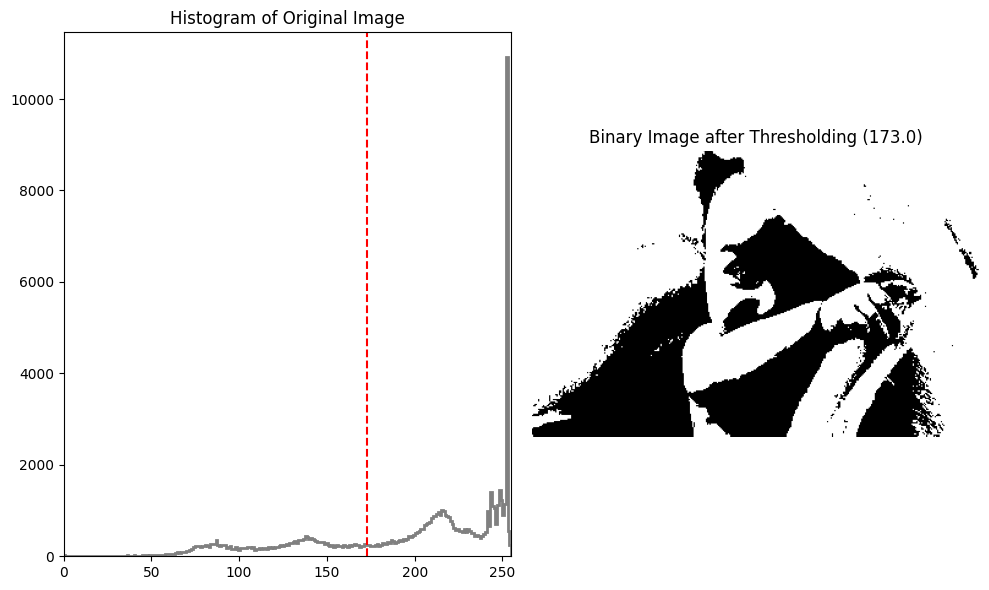

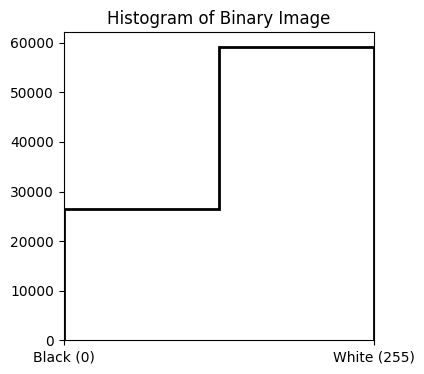

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('baby.jpeg', 0)

# Apply Otsu's Thresholding to find the optimal threshold value
ret, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Plot the histogram of the original image and the binary image after thresholding
plt.figure(figsize=( 10, 6))

# Plot the histogram of the original image
plt.subplot(1, 2, 1)
plt.hist(image.ravel(), bins=256, color='gray', histtype='step', linewidth=2)
plt.axvline(x=ret, color='r', linestyle='--')
plt.title("Histogram of Original Image")
plt.xlim(0, 255)

# Plot the binary image after thresholding
plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title(f"Binary Image after Thresholding ({ret})")
plt.axis('off')

plt.tight_layout()
plt.show()

# Plot the histogram of the binary image (black and white)
plt.figure(figsize=(4,4))
plt.hist(binary_image.ravel(), bins=2, color='black', histtype='step', linewidth=2)
plt.title("Histogram of Binary Image")
plt.xticks([0, 255], ['Black (0)', 'White (255)'])
plt.xlim(0, 255)
plt.show()
